# Google Play Store Data Analysis
 

In [1]:
# Importing Required Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from itertools import cycle, islice
from datetime import date
import re
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# This cell places figures to the centre 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# **EDA - Some Questions to ask**:

Main questions for this dataset are:

* Total Number of applications per category?
* Overall size of a market? 
* Number of downloads and overall revenue of all apps?
* Applications with highest number of installations?
* Applications with most number of reviews, highest rating, most revenue from installs?
* Expensive applications?
* Average Rating per category 
* Average Size of an app per Category 
* Number of free and paid apps available
* Average revenue from installs by category
* Number of Installations by category

In [3]:
# First we read the csv data
google_data = pd.read_csv('googleplaystore.csv')
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#  **Step 1: Understanding Data**
This is a very brief section that gives basic information about our dataset

In [4]:
google_data.shape

(10841, 13)

The Dataframe has 13 columns and 10841 rows. Later we will see that some of the rows are identical.

In [5]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Number of NaN's in every column
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Step 2: Data Cleaning:**

We start cleaning the data column by column from left to the right. Since The App column should not be edited, we start from category. I will go through every column one by one in this section

**Category column**

In [7]:
google_data.Category.isnull().sum() # Checking whether Category column has null-valued entries 

0

In [8]:
google_data.Category.unique() # Unique categories in the dataset

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

We can see one odd entry in the category column: 1.9. It is clear that it is an integer entry somehow located in the category column. If we explore further we can see that the app in the same row has a rating of 19 while it should be in range between 1 and 5.  


In [9]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


 We can see that the Category of the app is omitted which shifts the rest of the parameters to the left. Therefore, we can delete the row to avoid any confusion


In [10]:
google_data.drop([10472], inplace = True)

In [11]:
# Check whether the row has been deleted
google_data.iloc[10470:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We can also see the total number of apps per category with representation of barchart and piechart below. 

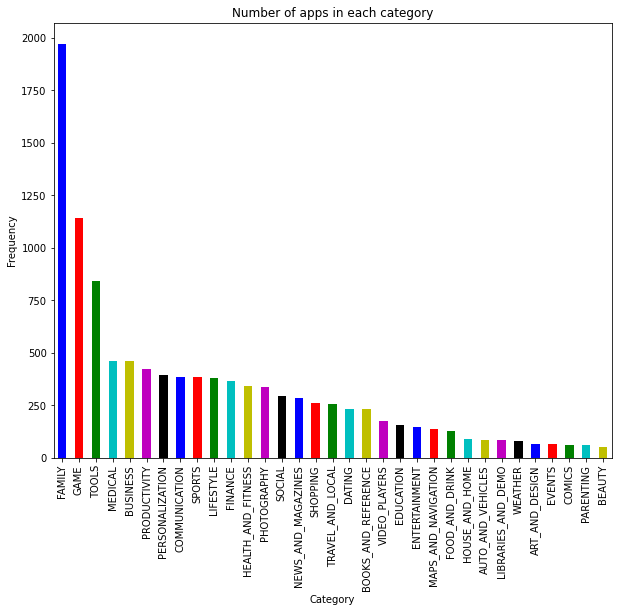

In [12]:
# Barchart
my_colors = list(islice(cycle(['b', 'r', 'g', 'c', 'y', 'm','k']), None, len(google_data))) # a way to represent different colours 

google_data.Category.value_counts().plot(kind = 'bar', color = my_colors, figsize = (10,8), title = 'Number of apps in each category');
plt.xlabel('Category')
plt.ylabel('Frequency');

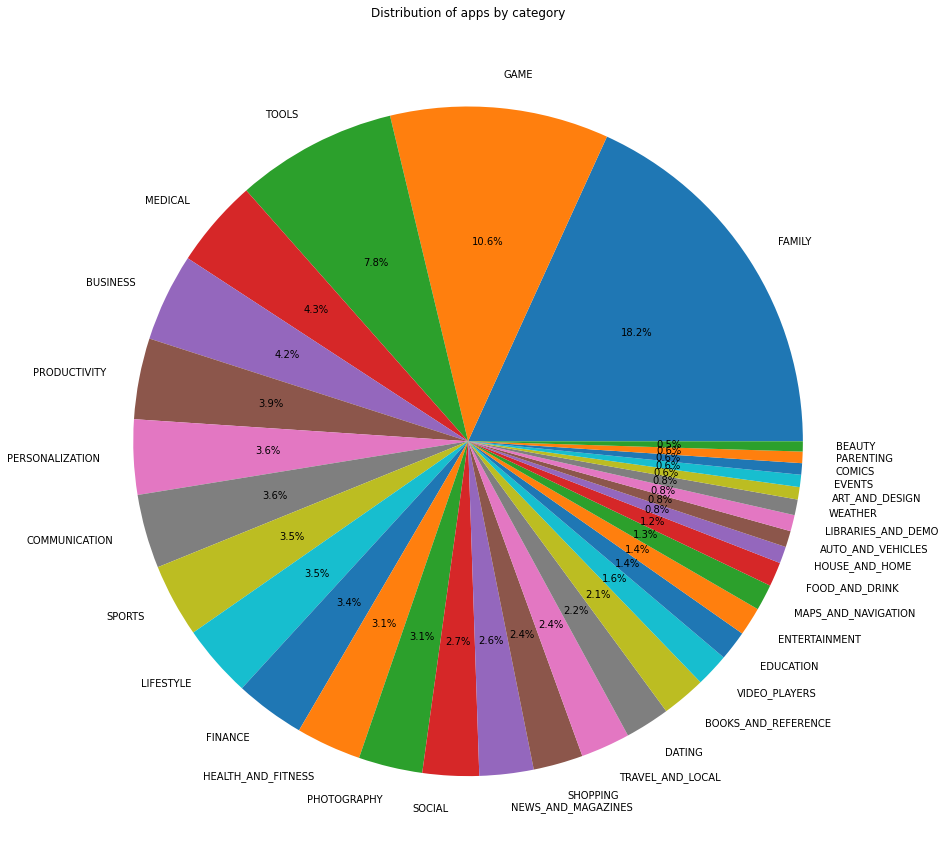

In [13]:
# Piechart
google_data['Category'].value_counts().plot.pie(y = google_data['Category'], figsize = (15, 16), label = '', autopct = '%1.1f%%', title = 'Distribution of apps by category', );# label = '' removes column name

**Rating column**

In [14]:
# We clean the Rating column with the help of lambda function

google_data['Rating'] = google_data['Rating'].apply(lambda x: str(x).replace('nan', 'NaN') if 'nan' in str(x) else str(x))  # Replace nan with NaN
google_data['Rating'] = google_data['Rating'].apply(lambda x: float(x)) # Rewrite column in a float format

google_data['Rating'] = google_data['Rating'].fillna(google_data['Rating'].median()) # Replace null numbers with median numbers

google_data.Rating.isnull().sum() # Now we don't have any null numbers in the column

0

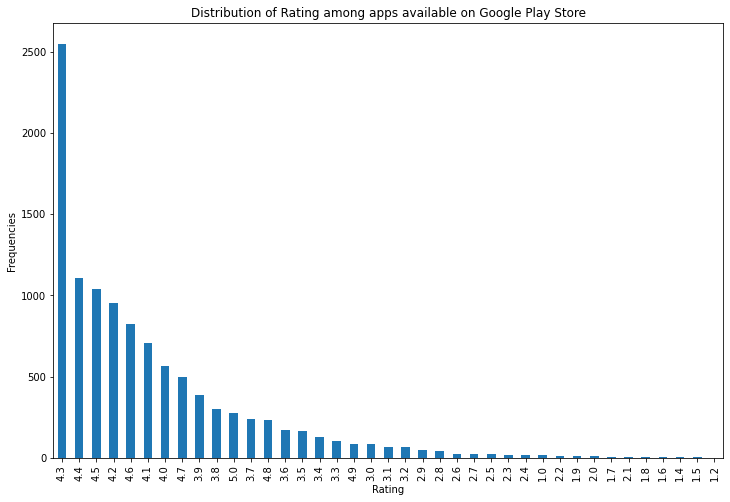

In [15]:
# Barchart

google_data.Rating.value_counts().plot(kind = 'bar', stacked = True, figsize = (12, 8), title = 'Distribution of Rating among apps available on Google Play Store'); # Historgram of frequencies 
plt.xlabel('Rating')
plt.ylabel('Frequencies');

We can clearly see that '4.3' is by far the most common Rating value

**Reviews column**

In [16]:
google_data.Reviews.isnull().sum() # No null values in reviews column

0

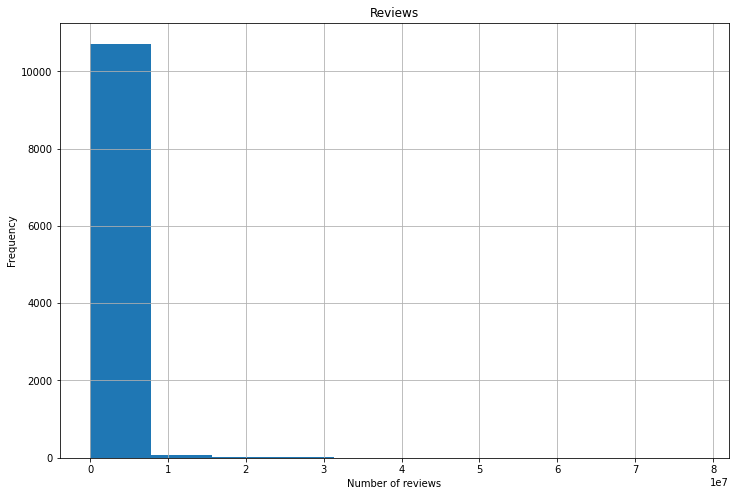

In [17]:
google_data.Reviews = pd.to_numeric(google_data.Reviews)

google_data.hist(column = 'Reviews', figsize = (12, 8))
plt.xlabel('Number of reviews')
plt.ylabel('Frequency');

The log review of graph above allows to inspect the lower scale

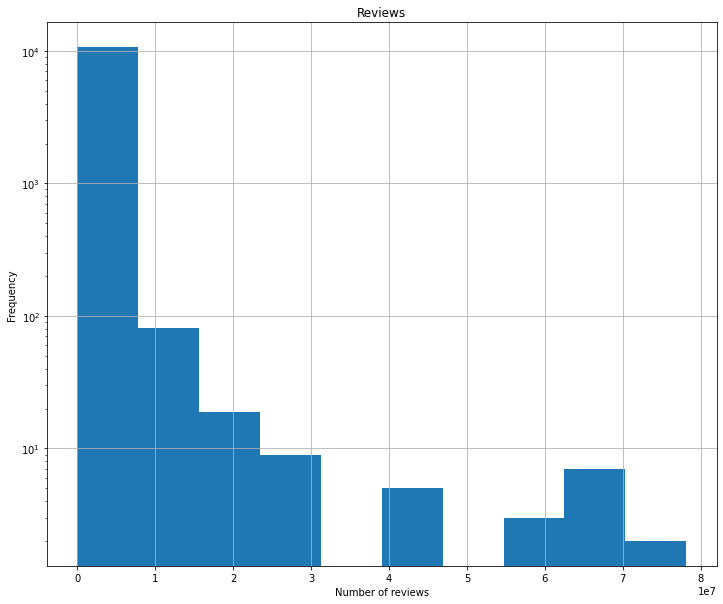

In [18]:
# Log view of the graph

google_data.hist(column = 'Reviews', figsize = (12, 10))
plt.xlabel('Number of reviews')
plt.ylabel('Frequency')
plt.yscale('log')

The vast majority of the apps have number of reviews no more than 1e7. This makes sense since only limited number of apps are very popular with high number of installs and reviews. 

**Size column**

In [19]:
# Occurences of different numbers at the Size column
google_data.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
257k                     1
160k                     1
116k                     1
778k                     1
97k                      1
Name: Size, Length: 461, dtype: int64

Where 'k' stands for kilobytes and 'M' stands for Megabytes

In [20]:
# Clean Size column
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('M', 'e+6') if 'M' in str(x) else str(x)) # Convert Megabytes to bytes
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('k', 'e+3') if 'k' in str(x) else str(x)) # Convert kilobytes to bytes

# Function converts number to float, if possible
def is_convertable(number):
    try:
        float(number)
        return True
    
    except:
        return False
    
    
size_column = google_data.Size.apply(lambda x: is_convertable(x))    
size_column.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

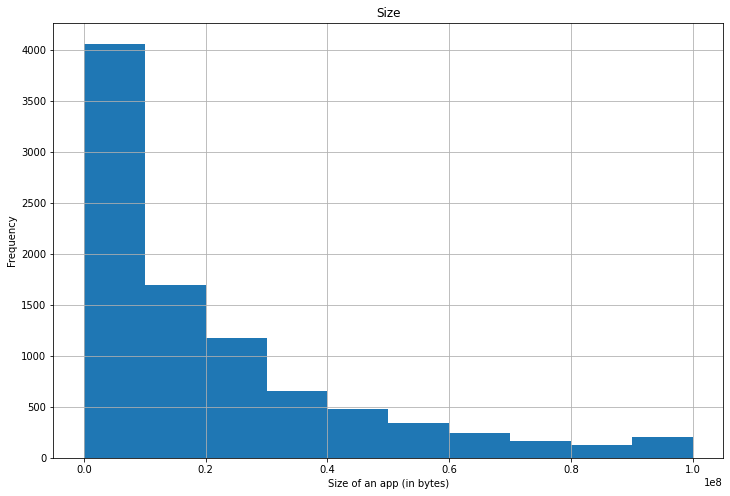

In [21]:
google_data.Size[~size_column].value_counts()
google_data.Size =  google_data.Size.replace('Varies with device', np.nan) # Replacing 'Varies with Device' with NaN to convert to float
google_data.Size = pd.to_numeric(google_data.Size) # Convert to numeric

# Plotting Histogram

google_data.hist(column = 'Size', figsize = (12, 8))
plt.xlabel('Size of an app (in bytes)')
plt.ylabel('Frequency');

Approximately half of the apps have less than 20 Megabytes of size

In [22]:
# Keep Varies with device option in the column for now
google_data.Size = google_data.Size.replace(np.nan, 'Varies with device')
google_data.Size.isnull().sum()

0

**Installs column**

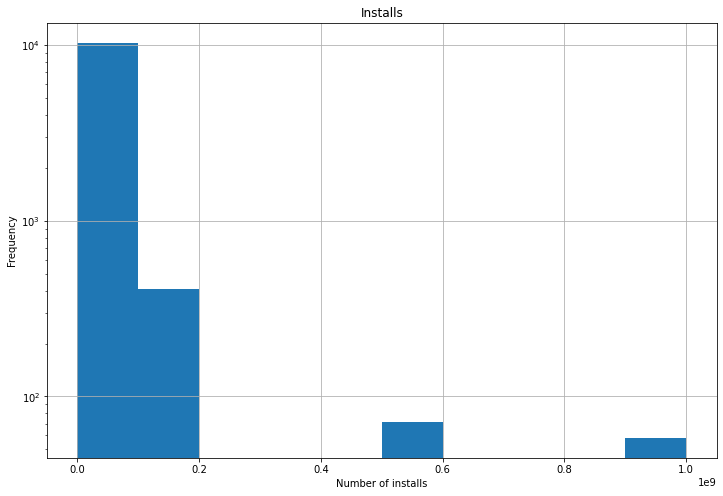

In [23]:
# Cleaning Installs
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

# Histogram of Installs 
google_data.Installs = pd.to_numeric(google_data.Installs)
google_data.hist(column = 'Installs', figsize = (12, 8))
plt.xlabel('Number of installs')
plt.ylabel('Frequency')
plt.yscale('log')

 Again, the majority of the apps have number of installs less than 0.2 * 10^9. Next cell shows Install distribution on a much lower range in x axis.

Number of Apps that have less than 100000 installations:  5890


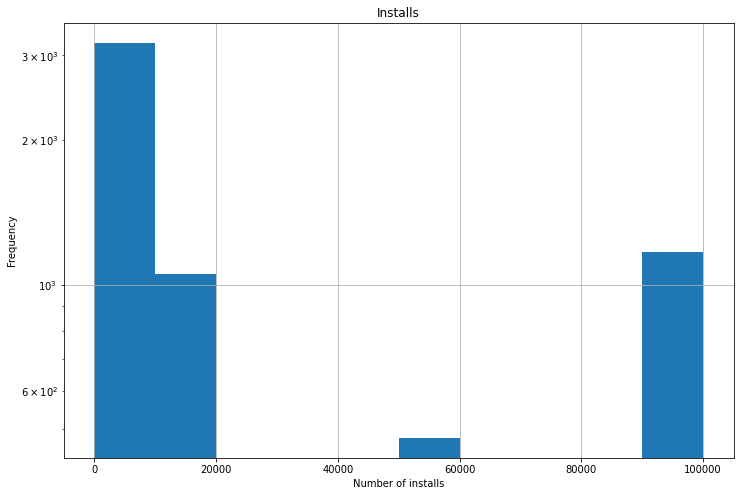

In [24]:
# Cleaning Installs
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

# Histogram of Installs 
google_data.Installs = pd.to_numeric(google_data.Installs)
google_data.hist(column = 'Installs', figsize = (12, 8), range = [0, 100000])
plt.xlabel('Number of installs')
plt.ylabel('Frequency')
plt.yscale('log')
print('Number of Apps that have less than 100000 installations: ', len(google_data[google_data.Installs <= 100000]) )

Almost half of the apps have less than 100,000 installs and more than 3,000 apps have less than 10,000 Installations in the Google Play Store 

**Type column**

In [25]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace = True) # Fill NaN entries with mode value in the column. 'Free' is the mode in this case 
google_data.Type.isnull().sum()

0

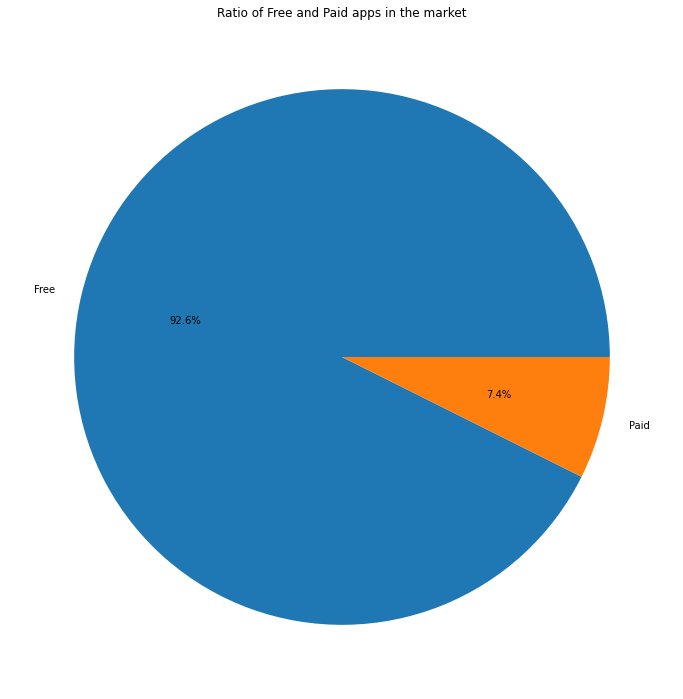

In [26]:
# The Free vs Paid apps
google_data.Type.value_counts().plot.pie(y = google_data.Type, figsize = (12, 14), autopct = '%1.1f%%', title = 'Ratio of Free and Paid apps in the market',label = '');

As expected, the majority of the apps are free of charge. Only 7.4% of all apps in the dataset are paid ones

**Price column**

In [27]:
google_data[google_data.Type == 'Paid'] # Shows paid columns. In the paid columns I want to delete the dollar ($) sign
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))  # delete dollar sign
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))

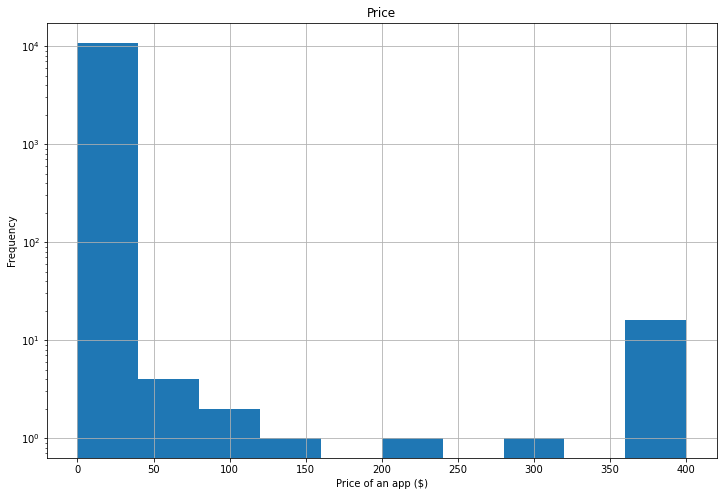

In [28]:
google_data.Price = pd.to_numeric(google_data.Price)
google_data.hist(column = 'Price', figsize = (12, 8))
plt.xlabel('Price of an app ($)')
plt.ylabel('Frequency');
plt.yscale('log')

We can see that almost all of the apps are free or have a price less than 50 USD. It is interesting to note that the apps with a pricetag of 350USD+ have more installs than the all apps that have 50$+ combined 

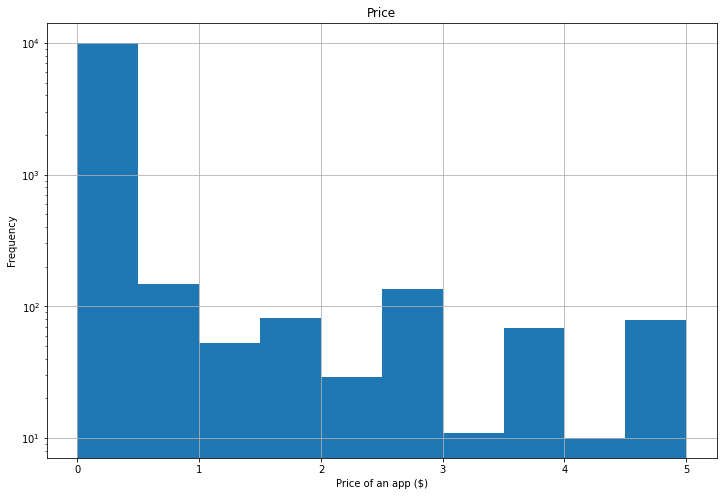

In [29]:
# We can go further and inspect the number of apps that lie in price range between 0 and 5
google_data.Price = pd.to_numeric(google_data.Price)
google_data.hist(column = 'Price', figsize = (12, 8), range = [0, 5])
plt.xlabel('Price of an app ($)')
plt.ylabel('Frequency');
plt.yscale('log')

The bar charts above include both free and paid apps in there analysis which in turn shows that most of the apps are free. From the pie chart above, we know that approximately 10,000 apps from the dataset are free. 

In [30]:
print('Number of apps that have a price tag of 350$+ :',len(google_data[google_data.Price > 350])) # 16 apps that cost more than 350 bucks... Most of them are 'I am rich' apps

Number of apps that have a price tag of 350$+ : 16


**Content Rating column**

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


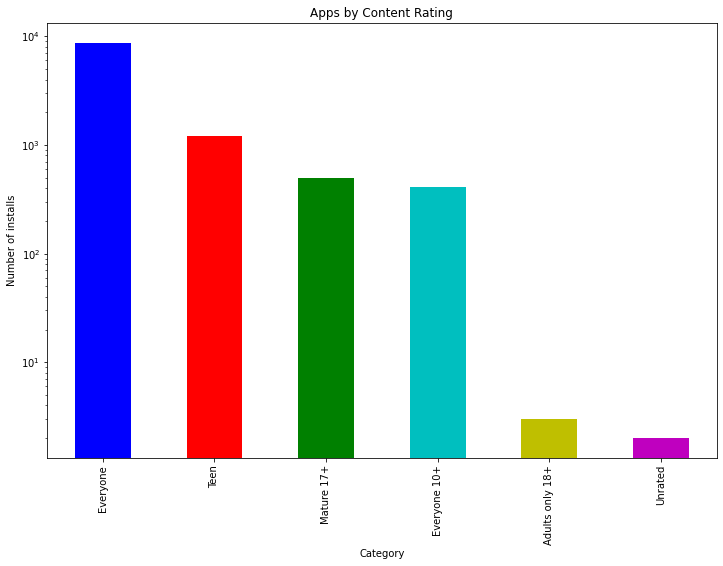

In [31]:
print(google_data['Content Rating'].unique())
google_data['Content Rating'].value_counts().plot(kind = 'bar', title = 'Apps by Content Rating', color = my_colors, figsize = (12,8)) # It is good but We cant see the data for some columns. Use log scale for y axis
plt.xlabel('Category')
plt.ylabel('Number of installs')
plt.yscale('log');

Most of the apps are suited for eveyone and only one app has an unrated category. May be the developer has not listed the category of an app

**Genres column**

In [32]:
# Show how data is distributed. We can see that majority of genre is represented in format Category;Subcategory
google_data.Genres.unique()
google_data.Genres.isnull().sum()

0

**Last Updated column**

For Last Updated Date, we can also get the difference between the current date and the date it was last updated. The time difference is represented in days


In [33]:
Last_updated = pd.to_datetime(google_data['Last Updated'])

google_data['Last Updated'] = Last_updated.apply(lambda x: date.today() - datetime.date(x))

google_data['Last Updated']

0       1173 days
1       1165 days
2        967 days
3       1021 days
4       1009 days
           ...   
10836   1339 days
10837    993 days
10838   1525 days
10839   2257 days
10840    974 days
Name: Last Updated, Length: 10840, dtype: timedelta64[ns]

**Current Version column**

In [34]:
google_data['Current Ver']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 10840, dtype: object

In [35]:
# Clean Current Version column
google_data['Current Ver'] = google_data['Current Ver'].apply(lambda x: 'Varies with device' if x == 'Varies with device' else re.findall('^[0-9]\.[0-9]|[\d]|\W*', str(x))[0]) # Leaves only numbered versions
google_data['Current Ver'] = google_data['Current Ver'].apply(lambda x: str(x).strip('0') if x == '0' else str(x)) # I have checked that there are now instances of version 0
google_data['Current Ver'] = google_data['Current Ver'].apply(lambda x: str(x).strip('0.3') if x == '0.3' else str(x)) # Neither there is an instance of 0.3

google_data['Current Ver'].unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '8.0', '3.3',
       '9.1', '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2',
       '3.5', '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3',
       '6.3', '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '6', '7.5',
       '9.9', '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1',
       '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4'],
      dtype=object)

**Android Version column**

In [36]:
google_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [37]:
# Rewrite Android column in numerical format
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).replace(' and up', '') if ' and up' in str(x) else str(x))
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).strip('W'))
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).split('-')[-1])

google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).strip()) # Remove extra whitespace before the end of a string

google_data['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '7.1.1', '2.0', '3.2', '7.1', '8.0', '3.1',
       '2.0.1', 'nan', '1.0'], dtype=object)

We can see Android versions are mostly numerical. We can also spot that there are 'Varies with device' and 'nan' entries for some apps

In [38]:
print('Number of \'Varies with Device\' in Android Ver column: ', google_data[google_data['Android Ver'] == 'Varies with device'].count()[0] )
print('Number of \'nan\' in Android Ver column', google_data[google_data['Android Ver'] == 'nan'].count()[0])

Number of 'Varies with Device' in Android Ver column:  1362
Number of 'nan' in Android Ver column 2


We can see that Varies with Device is a common entry in the Android Version column. We will keep both of them for now. 

# **Step 3: Data Visualization**




In [39]:
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.9e+07,10000.0,Free,0.0,Everyone,Art & Design,1173 days,1.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.4e+07,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,1165 days,2.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7e+06,5000000.0,Free,0.0,Everyone,Art & Design,967 days,1.2,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.5e+07,50000000.0,Free,0.0,Teen,Art & Design,1021 days,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8e+06,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1009 days,1.1,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.3e+07,5000.0,Free,0.0,Everyone,Education,1339 days,1.4,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6e+06,100.0,Free,0.0,Everyone,Education,993 days,1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5e+06,1000.0,Free,0.0,Everyone,Medical,1525 days,1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,2257 days,Varies with device,Varies with device


In [40]:
# Drop the rows that have Size as Varies with device
google_data.Size = google_data.Size.replace('Varies with device', np.nan) 
google_data.Size =  google_data.Size.dropna()
google_data.Size = google_data.Size.apply(lambda x: float(x))

In [41]:
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,1173 days,1.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,1165 days,2.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,967 days,1.2,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,1021 days,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1009 days,1.1,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0.0,Everyone,Education,1339 days,1.4,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0.0,Everyone,Education,993 days,1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000.0,1000.0,Free,0.0,Everyone,Medical,1525 days,1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2257 days,Varies with device,Varies with device


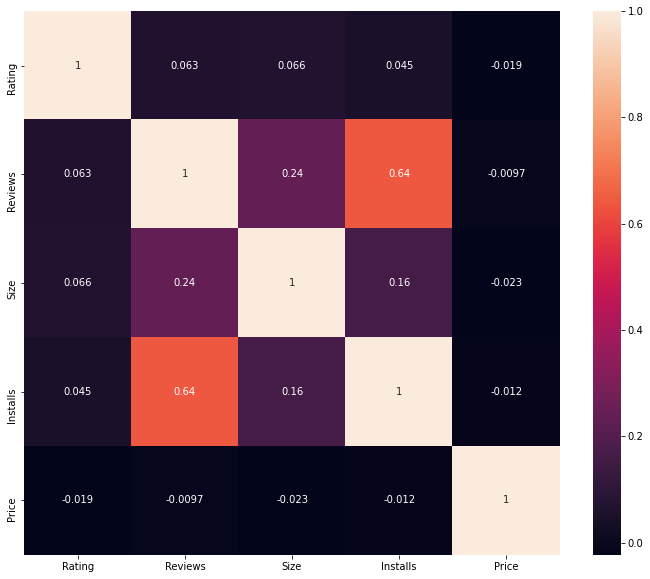

In [42]:
# Correlation heat map
plt.figure(figsize = (12, 10)); # Adding command before the heatmap allows to control the size of a plot
sns.heatmap(google_data.corr(), annot = True);

**Number of apps per category:**

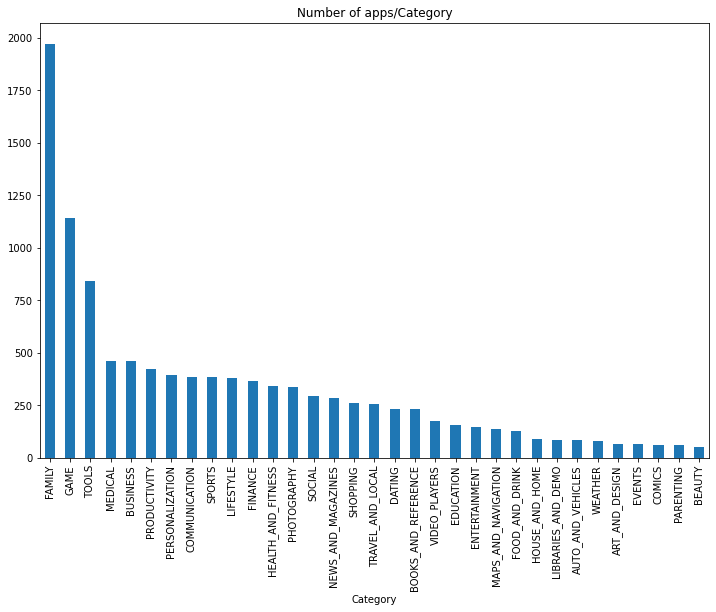

In [43]:
# Total Number of apps per category

google_data.groupby('Category').count()["App"].sort_values(ascending=False).plot(kind='bar',title='Number of apps/Category', fontsize=10, figsize = (12, 8));

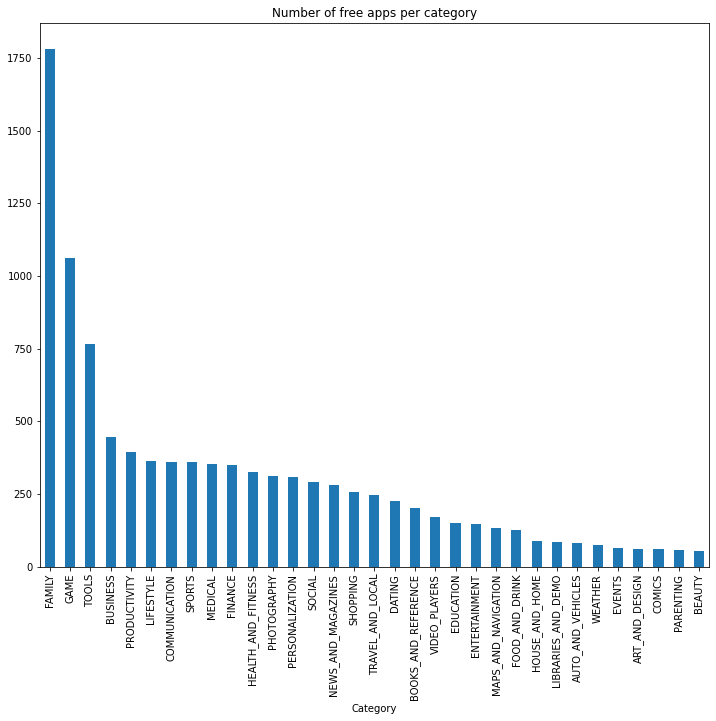

In [44]:
# Number of free apps per Category
free_apps = google_data[google_data.Type == 'Free']
free_apps.groupby('Category').count()['App'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12,10), title = 'Number of free apps per category'); 

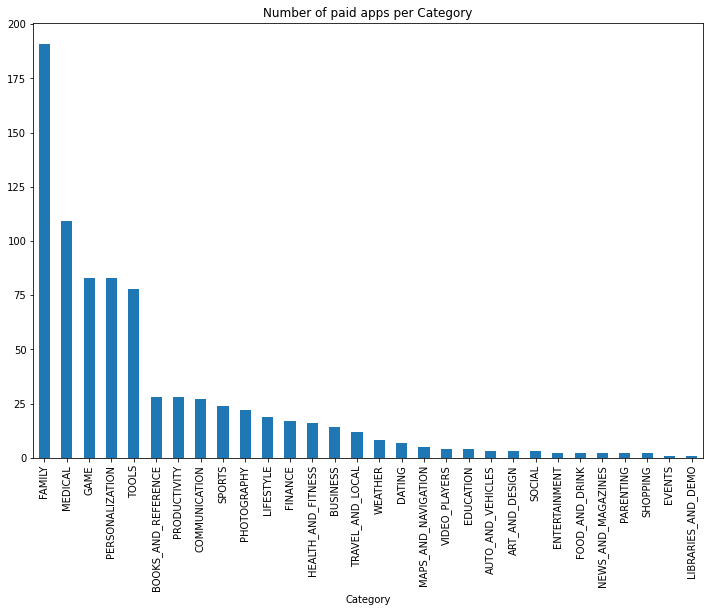

In [45]:
# Number of paid app per category

paid_apps = google_data[google_data.Price > 0]
paid_apps.groupby('Category').count()["App"].sort_values(ascending=False).plot(kind='bar',title='Number of paid apps per Category', fontsize=10, figsize = (12, 8));

# Shows the Number of Installs by category
# google_data.groupby('Category').sum().sort_values(by ='Installs', ascending = 'False')['Installs'].plot(kind = 'bar', title = 'Installs by Category', fontsize = 10, figsize = (14,10));


From the Previous three plots we can clearly see that the Family is the most popular category both in free and paid segment. The Game is also very popular both in Free and Paid categories. 

**Apps with more than billion installs:**

Number of unique apps that have more than a billion installs: 20


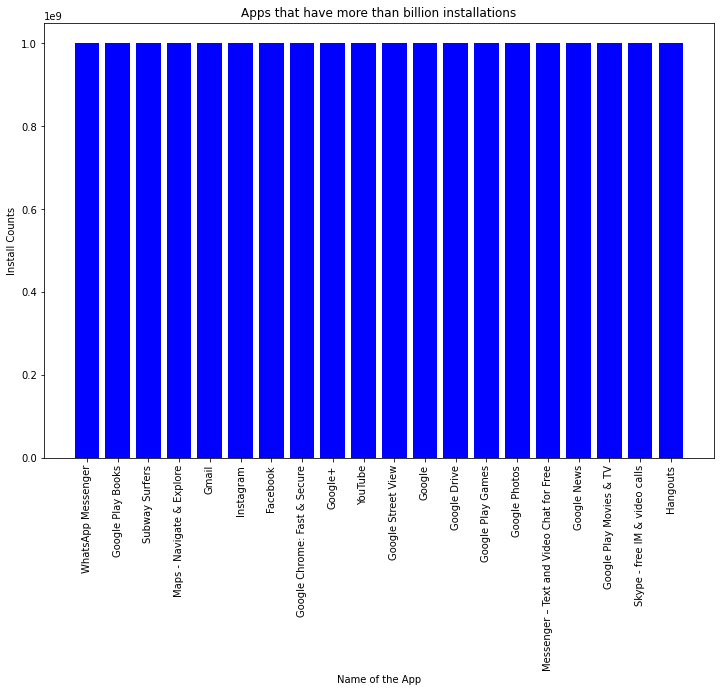

In [46]:
# Apps that have more than 1 Billion installations
google_data.drop_duplicates(subset = 'App', inplace = True) # Remove duplicate apps. The apps have almost identical rows - having a very small difference in number of installs, but being same in other columns

billion_installs = google_data[google_data.Installs >= 1e9]

billion_installs = google_data.sort_values('Installs', ascending = False).head(len(billion_installs))

print('Number of unique apps that have more than a billion installs:', len(billion_installs)) 

plt.figure(figsize = (12,8))
plt.bar('App', 'Installs', data = billion_installs, color = 'blue')
plt.xticks(rotation = 90);
plt.xlabel('Name of the App')
plt.ylabel('Install Counts')
plt.title('Apps that have more than billion installations');


The google playstore database only shows number of installations as a milestone: e.g. 1,000,000+ instead of precise number of installations

The bar plot has 20 unique entries. A half of the apps (10) presented in the list are Google products

We have already seen the distribution of all apps by category. Let's now investigate categorical distribution of top 500 apps in play store

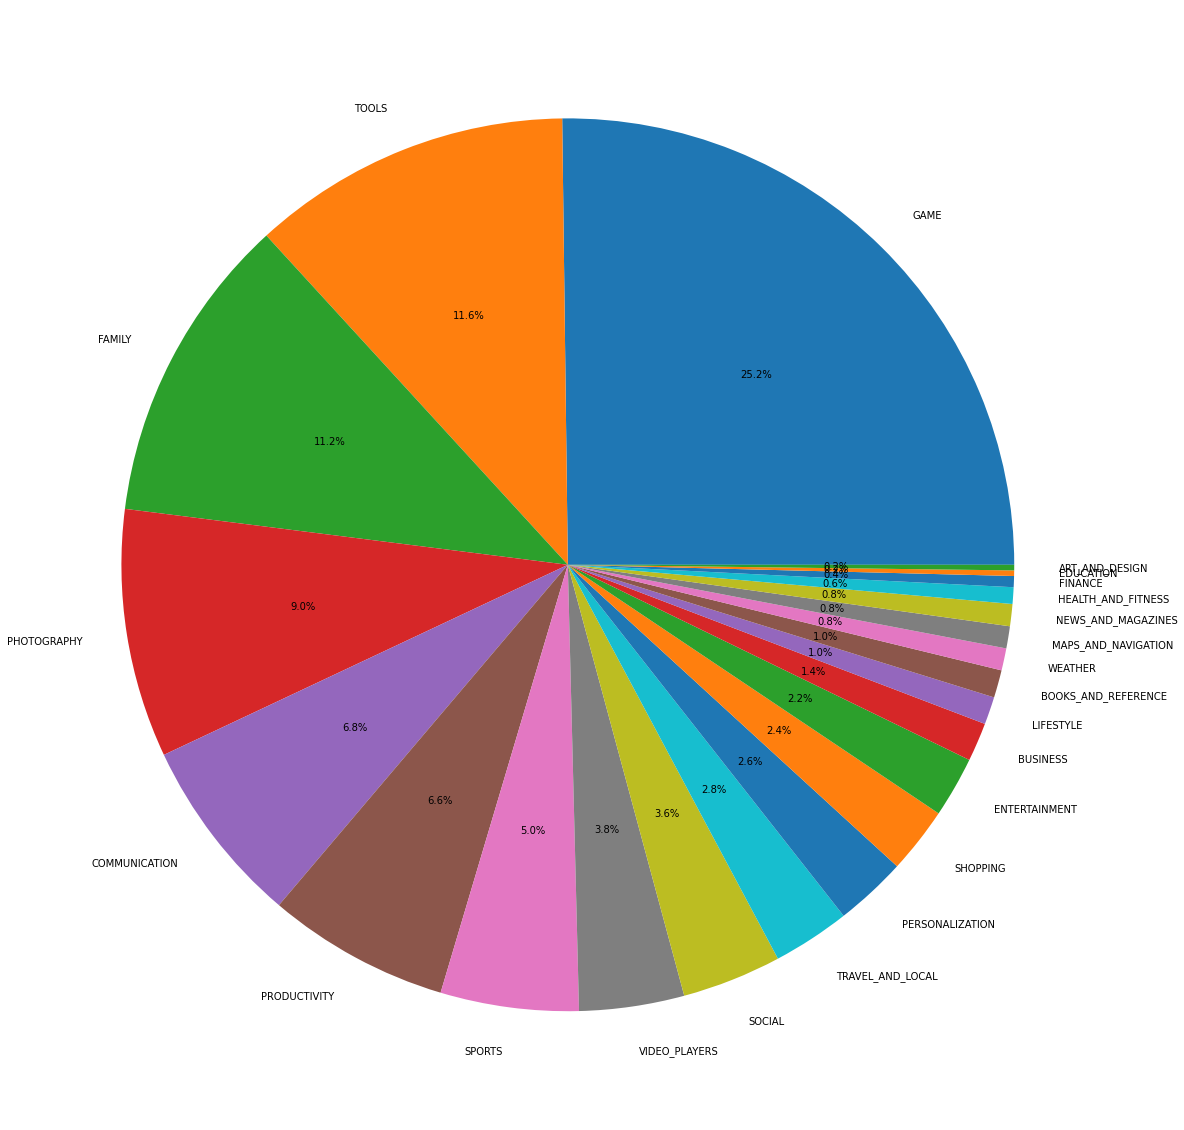

In [47]:
top_five_hundred = google_data.sort_values('Installs', ascending= False).head(500) # Top 500 apps by Category
# labels = df3['Content Rating'].value_counts(sort = True).index

top_five_hundred.Category.value_counts().plot.pie(y = top_five_hundred.Category,fontsize = 10, figsize = (20,32), autopct='%1.1f%%', label = '');


Quarter of top 500 popular apps lie in the games category. It shows that games are really popular and get installed by a high number of users

**Market Size of Paid Apps and Revenue distribution by Category:**

In [48]:
# paid_apps = google_data[google_data.Price > 0]
google_data.Price.describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [49]:
# Revenue of paid apps by category
paid_apps = google_data[google_data.Price > 0]
paid_apps['Revenue'] = paid_apps.Price * paid_apps.Installs
paid_apps


<ipython-input-49-9ce67dbb62ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps['Revenue'] = paid_apps.Price * paid_apps.Installs


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000.0,Paid,4.99,Everyone,Business,1096 days,1.5,4.0,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000.0,Paid,4.99,Everyone,Business,1444 days,3.4,3.0,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000.0,Paid,3.99,Everyone,Communication,994 days,7.5,4.1,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000.0,Paid,3.99,Mature 17+,Dating,1010 days,2.6,4.1,39900.0
477,Calculator,DATING,2.6,57,6200000.0,1000.0,Paid,6.99,Everyone,Dating,1247 days,1.1,4.0,6990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.3,17,157000.0,100.0,Paid,0.99,Mature 17+,Entertainment,1947 days,1.2,2.1,99.0
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400000.0,1000.0,Paid,7.99,Everyone,Health & Fitness,960 days,1.9,4.2,7990.0
10782,Trine 2: Complete Story,GAME,3.8,252,11000000.0,10000.0,Paid,16.99,Teen,Action,2218 days,2.2,5.0,169900.0
10785,"sugar, sugar",FAMILY,4.2,1405,9500000.0,10000.0,Paid,1.20,Everyone,Puzzle,1024 days,2.7,2.3,12000.0


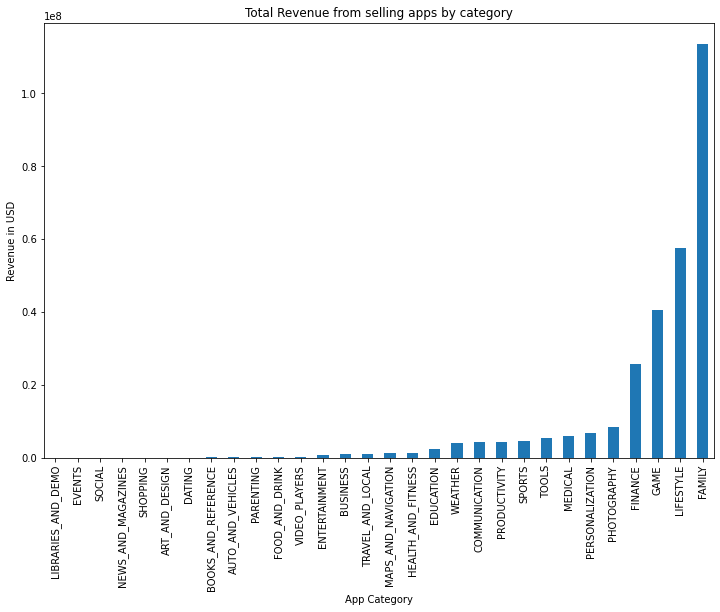

In [50]:
paid_apps.groupby('Category').sum().sort_values(by = 'Revenue', ascending = 'False')['Revenue'].plot(kind = 'bar',title='Total Revenue from selling apps by category', fontsize=10, figsize = (12, 8));
plt.xlabel('App Category')
plt.ylabel('Revenue in USD');

We can see that if the companies business aim is to make money from selling the app, the target category should be family category, followed by lifestyle and game.  

In [51]:
# Delete duplicate rows
paid_apps.sort_values('App', inplace = True)
paid_apps.drop_duplicates(subset = 'App', keep = False, inplace = True )
print('Total Revenue from installations of all Paid Apps is', paid_apps.Revenue.sum()/1e6,'million USD') 


Total Revenue from installations of all Paid Apps is 291.14845778999995 million USD


<ipython-input-51-6fa67a10787b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps.sort_values('App', inplace = True)
<ipython-input-51-6fa67a10787b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps.drop_duplicates(subset = 'App', keep = False, inplace = True )


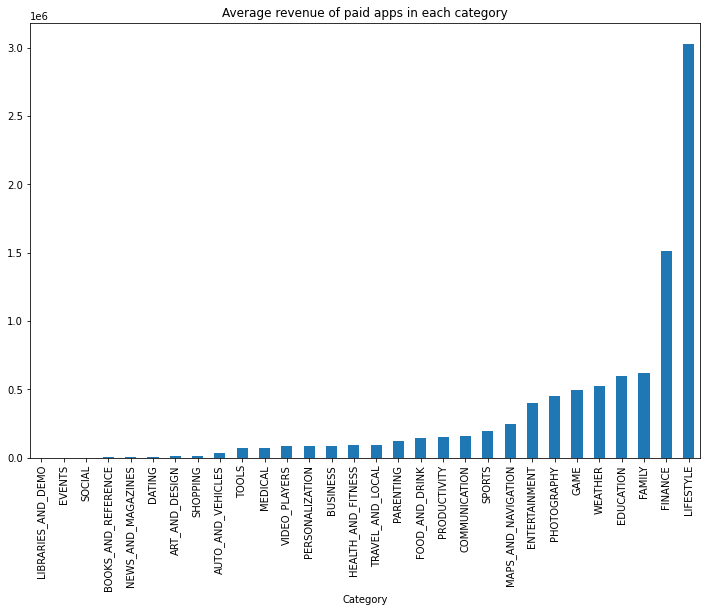

In [52]:
paid_apps.groupby('Category').mean().sort_values(by = 'Revenue', ascending = 'False')['Revenue'].plot(kind = 'bar', title = 'Average revenue of paid apps in each category', fontsize = 10, figsize = (12,8));


LifeStyle Apps have by far highest average of revenue (Price * Number of Installs). Each lifestyle app makes roughly 3 million dollars on average.


**Average Price per Category:**

Average price of all apps (free + paid) is:  1.0992990992856404 $


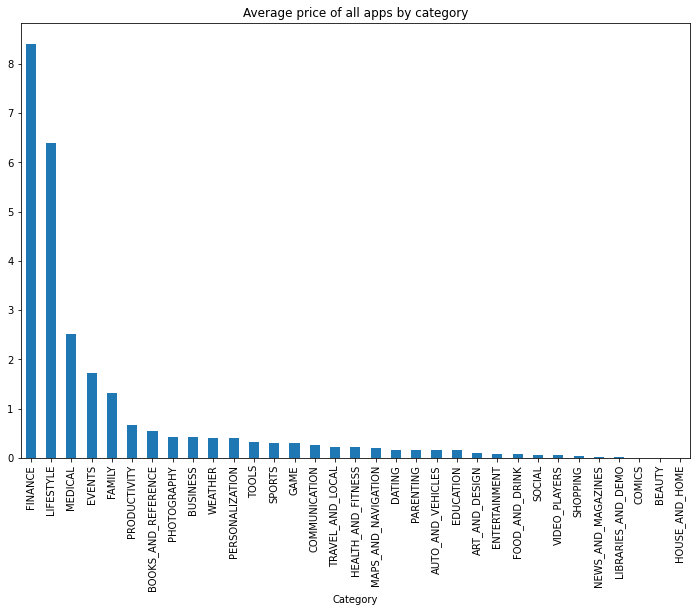

In [53]:
google_data.groupby('Category').mean().sort_values(by = 'Price', ascending = False)['Price'].plot(kind = 'bar', title = 'Average price of all apps by category', fontsize = 10, figsize = (12,8));
print('Average price of all apps (free + paid) is: ', google_data.Price.mean(), '$')

We can see that some categories such as Comics and Beauty only have free apps. Finance apps have highest average price which is 8 times higher than the average.

Average price of paid apps:  14.045145502645504 $


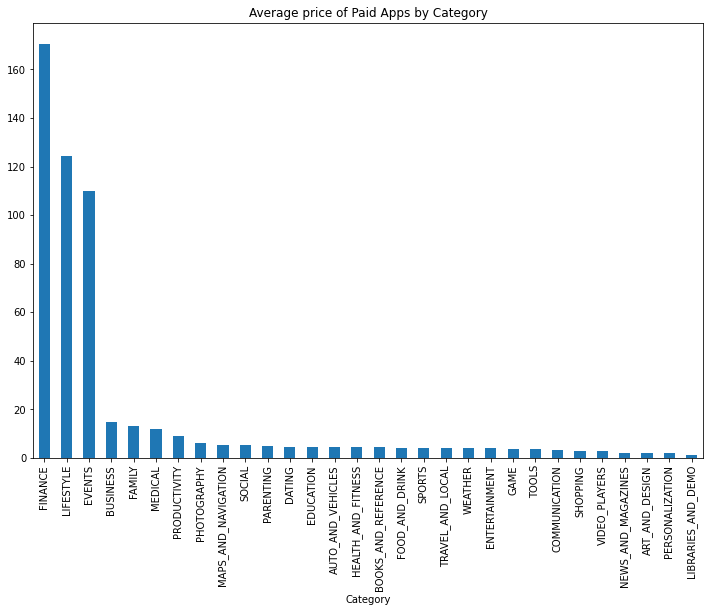

In [54]:
paid_apps.groupby('Category').mean().sort_values(by = 'Price', ascending = False)['Price'].plot(kind = 'bar', title = 'Average price of Paid Apps by Category', fontsize = 10, figsize = (12,8));
print('Average price of paid apps: ', paid_apps.Price.mean(), '$' )

We can see that the average price of paid apps is around 14USD. The bar chart above clearly shows that high average price is heavily influenced by Finance, Lifestyle and Events categories, where each app costs on average 100$+


**Number of Installations:**

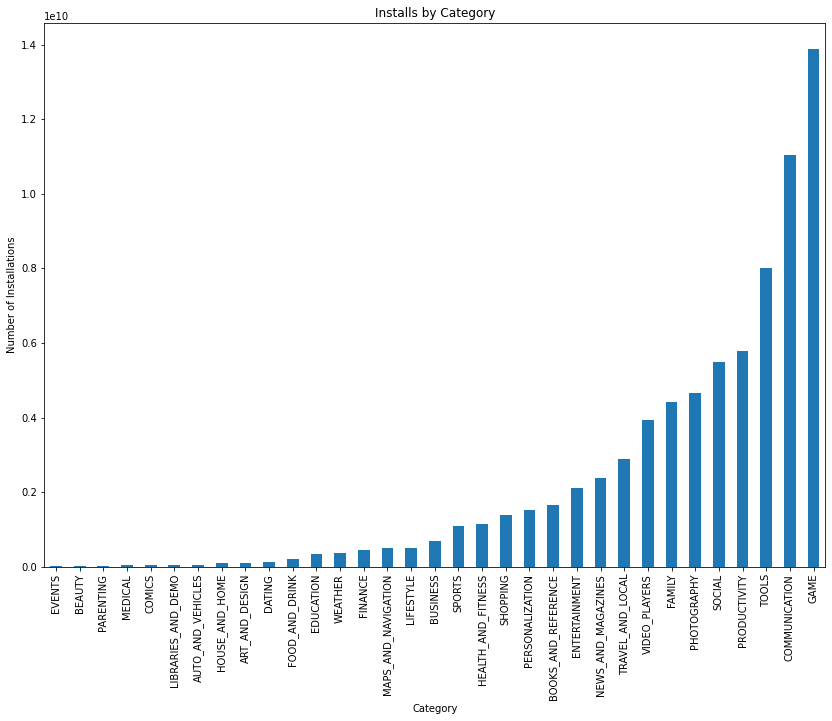

In [55]:
google_data.groupby('Category').sum().sort_values(by ='Installs', ascending = 'False')['Installs'].plot(kind = 'bar', title = 'Installs by Category', fontsize = 10, figsize = (14,10));
plt.ylabel('Number of Installations');

We can see that the Game Category has the highest number of installations

**Average Size of the applications**

Average size of an application is 20.39528931451613 Megabytes


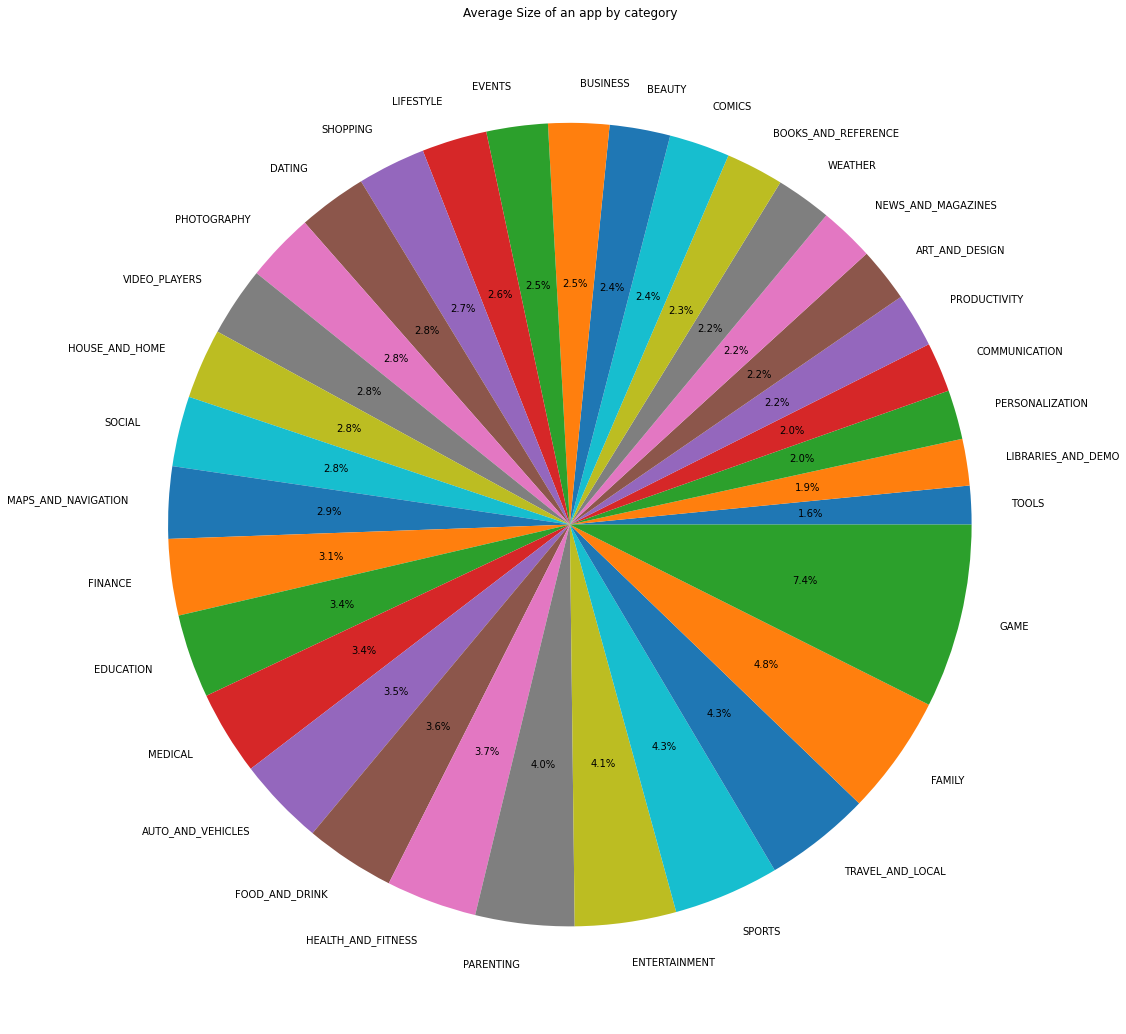

In [56]:
google_data.groupby('Category').mean().sort_values(by = 'Size', ascending = 'False')['Size'].plot(kind = 'pie',autopct='%1.1f%%', title = 'Average Size of an app by category', label = '', fontsize = 10, figsize = (18, 20)); 
print('Average size of an application is', google_data.Size.mean()/1e6,'Megabytes' )

We can see that game category has by far the biggest size of an app, followed by family and travel categories. Average size of an app from all categories is 20.4 Megabytes

In [57]:
google_data.Size.describe()

count    8.432000e+03
mean     2.039529e+07
std      2.182754e+07
min      8.500000e+03
25%      4.600000e+06
50%      1.200000e+07
75%      2.800000e+07
max      1.000000e+08
Name: Size, dtype: float64

**Correlation Between Rating and Number of Review:**

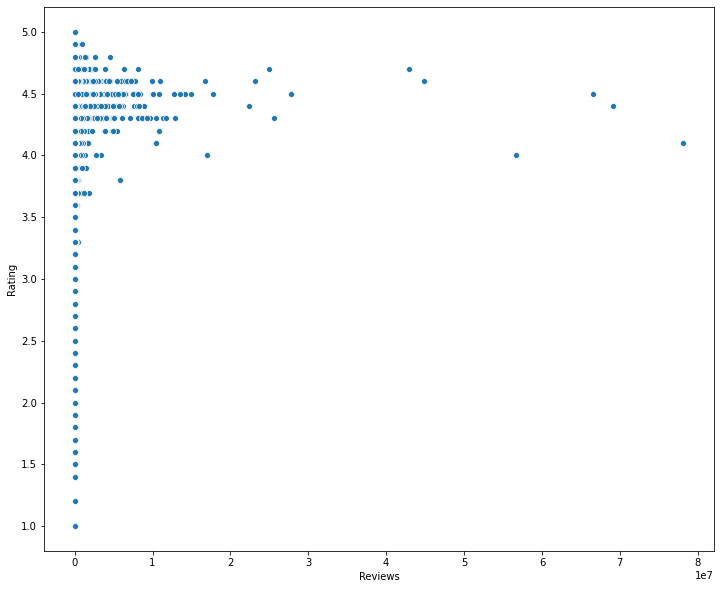

In [58]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = google_data.Reviews, y = google_data.Rating, edgecolor = 'white');

Personally, I could not find any direct correlation between reviews and rating.We can see that the apps that have high amount of reviews generally have a rating above 4.0

**Correlation between Installs and Rating:**

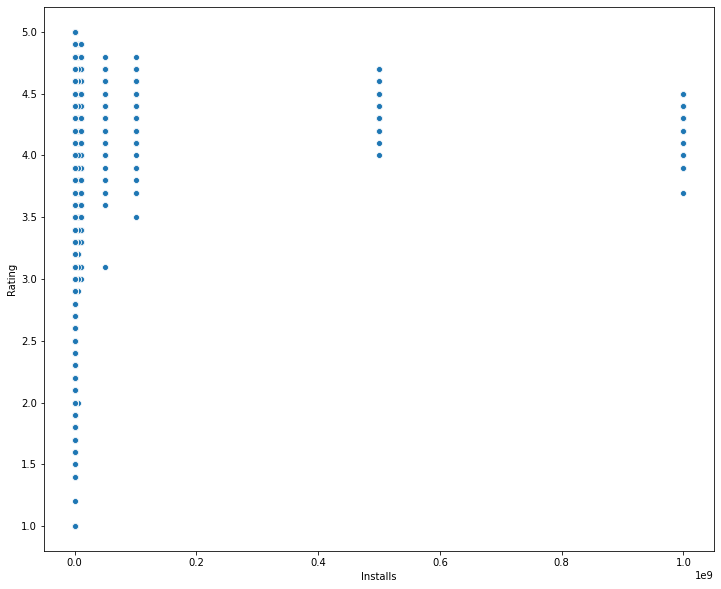

In [59]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = google_data.Installs, y = google_data.Rating, edgecolor = 'white');

Most of the Apps have a rating between 3.5 and 4.5. With increase in number of installs, the data is more clustered around the mean. 

**Rating**

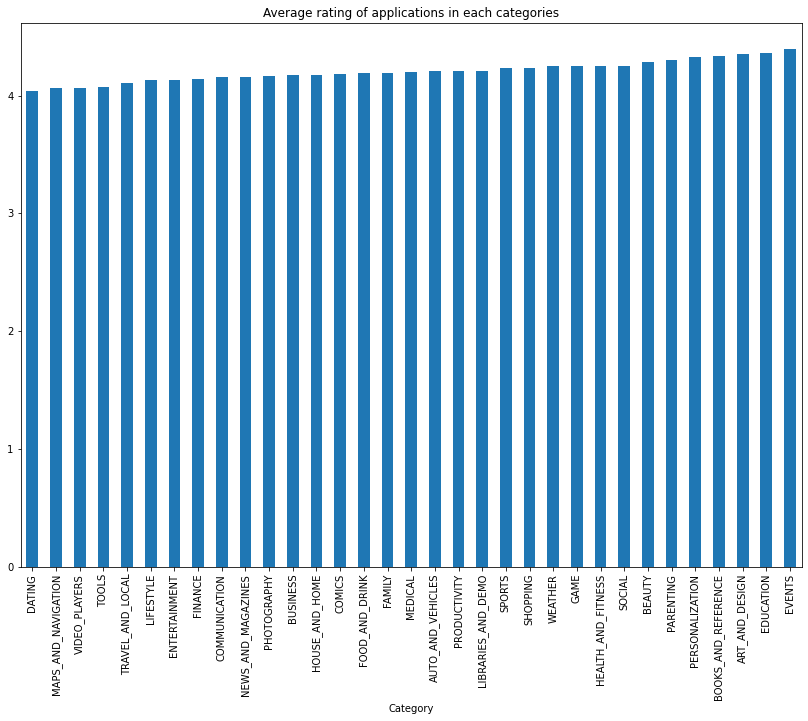

In [60]:
google_data.groupby('Category').mean().sort_values(by = 'Rating', ascending = 'False')['Rating'].plot(kind = 'bar', title = 'Average rating of applications in each categories', fontsize = 10, figsize = (14,10));

We can see that all categories have a mean rating of 4 and higher. Highest rating is for EVENTS category.

**Most number of reviews. highest rating, most revenue from installations, most installations
**

There are several Apps that have maximum rating of 5. Therefore additional threshold parameters such as number of reviews and Installs were introduced to ensure that the app has some popularity. 


In [61]:
google_data[(google_data.Rating == 5.0) & (google_data.Reviews > 100) & (google_data.Installs >= 5000)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8058,Oración CX,LIFESTYLE,5.0,103,3800000.0,5000.0,Free,0.0,Everyone,Lifestyle,1290 days,5.1,4.1


In [62]:
# Most Number of reviews
google_data[google_data.Reviews == google_data.Reviews.max()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,965 days,Varies with device,Varies with device


Most Installations - Since 20 apps have 1 Billion+ Installations, I have shown The App with highest Reviews and Installs combined 


In [63]:
google_data[(google_data.Installs == google_data.Installs.max ()) & (google_data.Reviews == google_data.Reviews.max())]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,965 days,Varies with device,Varies with device


The Facebook app has the most number of installs and reviews 

In [64]:
# Most Revenue from Installations
paid_apps[paid_apps.Revenue == paid_apps.Revenue.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,975 days,1.5,Varies with device,69900000.0


In [65]:
# Apps with Maximum Price
paid_apps[paid_apps.Price == paid_apps.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000.0,Paid,400.0,Everyone,Lifestyle,1057 days,1.0,4.1,4000000.0


**When Apps were updated last:**

In [66]:
google_data['Last Updated']

0       1173 days
1       1165 days
2        967 days
3       1021 days
4       1009 days
           ...   
10836   1339 days
10837    993 days
10838   1525 days
10839   2257 days
10840    974 days
Name: Last Updated, Length: 9659, dtype: timedelta64[ns]

In [67]:
google_data['Last Updated'] = google_data['Last Updated'].apply(lambda x: x.days) # Convert Last Updated column to represent in days  


In [68]:
array = google_data.Category.unique()
for i in range(len(array)):
    print('Category:',array[i], 'Mean:', google_data[google_data.Category == array [i]]['Last Updated'].mean(), 'days')

Category: ART_AND_DESIGN Mean: 1082.515625 days
Category: AUTO_AND_VEHICLES Mean: 1069.6705882352942 days
Category: BEAUTY Mean: 1107.5094339622642 days
Category: BOOKS_AND_REFERENCE Mean: 1383.7882882882882 days
Category: BUSINESS Mean: 1259.9809523809524 days
Category: COMICS Mean: 1072.9285714285713 days
Category: COMMUNICATION Mean: 1252.1714285714286 days
Category: DATING Mean: 1031.017543859649 days
Category: EDUCATION Mean: 1210.1344537815125 days
Category: ENTERTAINMENT Mean: 1049.9117647058824 days
Category: EVENTS Mean: 1085.4375 days
Category: FINANCE Mean: 1128.2434782608696 days
Category: FOOD_AND_DRINK Mean: 1063.0089285714287 days
Category: HEALTH_AND_FITNESS Mean: 1144.267361111111 days
Category: HOUSE_AND_HOME Mean: 1183.3108108108108 days
Category: LIBRARIES_AND_DEMO Mean: 1401.2619047619048 days
Category: LIFESTYLE Mean: 1262.791327913279 days
Category: GAME Mean: 1284.0041710114704 days
Category: FAMILY Mean: 1294.4164847161571 days
Category: MEDICAL Mean: 1246.8886

count    9659.000000
mean     1241.184698
std       406.772568
min       960.000000
25%       982.000000
50%      1056.000000
75%      1327.500000
max      3961.000000
Name: Last Updated, dtype: float64


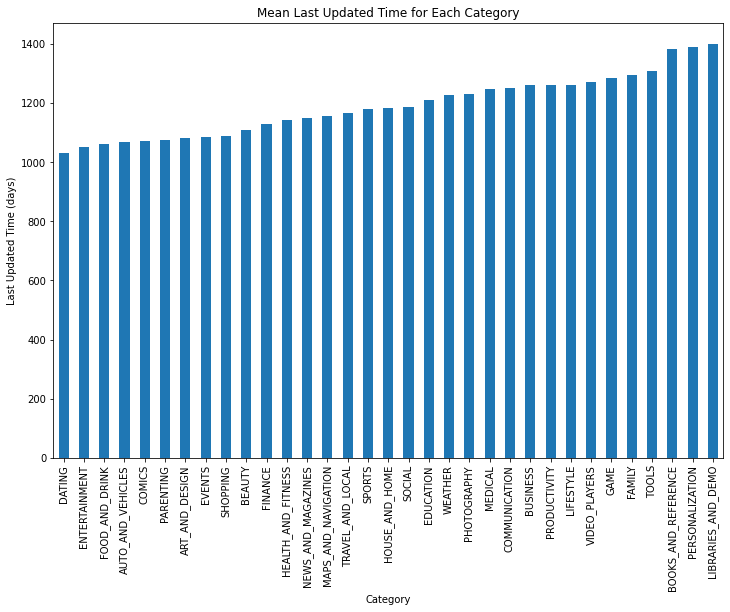

In [69]:
google_data.groupby('Category').mean()
google_data.groupby('Category').mean().sort_values(by = 'Last Updated', ascending = 'False')['Last Updated'].plot(kind = 'bar', title = 'Mean Last Updated Time for Each Category', fontsize = 10,  figsize = (12, 8));
plt.ylabel('Last Updated Time (days)');
print(google_data['Last Updated'].describe()) # The description of the column

We can see that there is no strong correlation between when the app was last updated and other parameters

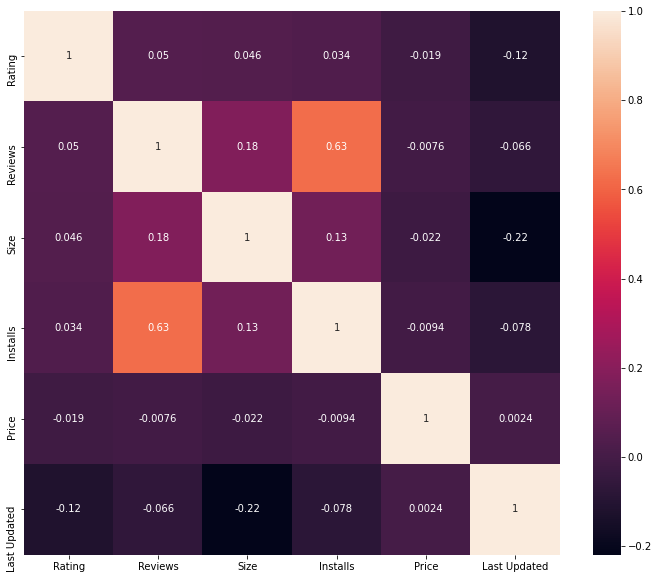

In [70]:
plt.figure(figsize = (12, 10));
sns.heatmap(google_data.corr(), annot = True);
# Heatmap to check the correlation between the features

   **Data Visualization: Key Takeaways:**
* Around **19%** of all apps are within **Family Category**
* Most expensive apps are in the **Finance Category** 
* Only **7.4 %** of apps are **Paid**
* There are **20** unique apps that have more than billion installations - half of them are Google products 
* **Games** are the most popular/installed category
* Average size of an app in the play store is **20.4 Megabytes**
* If the company's strategy is to make profit based on the app installations, development of a LifeStyle category app is an option. Lifestyle themed app has an average revenue of 3 million USD based on the revenue from installation.
* **81.8%** of the apps belong to **Everyone category** 
* No correlation between app Rating and Number of installs is observed
* All the categories have an average rating of 4+

**Apps with most installations, reviews, revenues and other metrics:** 

* App with highest number of rating, reviews and installs (combined): Oracion CX
* App with most number of reviews: Facebook (78158306 reviews)
* App with most number of installs and reviews (combined): Facebook
* Maximum price of an app: I'm Rich - Trump Edition	(400 USD)
* App with highest revenue from installations: Minecraft (69.9 millions USD from installations)
	



# Predicting Rating of an App

Let's first investigate the type of columns in our dataframe:

In [71]:
df = google_data
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated        int64
Current Ver        object
Android Ver        object
dtype: object

In next cell, I have dropped several columns that bring little value to the analysis in my opinion.

In [72]:
df = df.drop(['App', 'Current Ver'], axis= 'columns') 

Next we will write columns in an integer format, so that it will be readable by our ML algorithm 

In [73]:
df['Rating'] = df['Rating'].astype('int64')
df['Size'] = df['Size'].fillna(df.Size.median()) # Replacing the null Size with median value
df['Size'] = df['Size'].astype('int64')
df['Installs'] = df['Installs'].astype('int64')
df['Price'] = df['Price'].astype('int64')

We also create Dummy variables to increase the accuracy of our deployed models. Dummy variables are created for category, content_rating and genre columns. 

In [74]:
df2 = df.copy()
df2.Type = df2.Type.map({"Free":0, "Paid" : 1})
category_dummies = pd.get_dummies(df2.Category, prefix = 'Category')
content_rating_dummies = pd.get_dummies(df2['Content Rating'], prefix = 'content_rating')
genre_dummies = pd.get_dummies(df2['Genres'], prefix = 'Genres')

In [75]:
df2.dtypes
# Now most of the columns are in the integer format

Category          object
Rating             int64
Reviews            int64
Size               int64
Installs           int64
Type               int64
Price              int64
Content Rating    object
Genres            object
Last Updated       int64
Android Ver       object
dtype: object

In [76]:
df3 = pd.concat([df2, category_dummies, content_rating_dummies, genre_dummies], axis = 1) # Combining dummy variables to our original dataframe
df3.isna().sum()


Category                                        0
Rating                                          0
Reviews                                         0
Size                                            0
Installs                                        0
                                               ..
Genres_Video Players & Editors                  0
Genres_Video Players & Editors;Creativity       0
Genres_Video Players & Editors;Music & Video    0
Genres_Weather                                  0
Genres_Word                                     0
Length: 168, dtype: int64

In [77]:
df4 = df3.drop(['Category', 'Content Rating', 'Genres', 'Android Ver'], axis = 1) # Dropping non-numeric columns: Dropped columns have little value for ML model 

In [78]:
# Checking the shape of our new dataframe
df4.shape

(9659, 164)

Now we need to define X and y variables for ML models. y is our Rating column and X as every other column in our dataframe.

In [79]:
X = df4.drop('Rating', axis = 1)
y = df4.Rating

# Doing train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Scaling techniques are used on X_train and X_test variables to increase the accuracy of a models. 

In [80]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Logistic Regression:**

In [81]:
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)


LogisticRegression_accuracy: 0.7598343685300207


/home/docode/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree Classifier**

In [82]:
dtree_model=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_model.fit(X_train,y_train)
dtree_pred=dtree_model.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)
print('Decision Tree Classifier accuracy:',dtree_ac)

Decision Tree Classifier accuracy: 0.6899585921325052


**SVM Regressor**

In [ ]:
svc_model=SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
svr_pred=svc_model.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)
print('DecisionTree_Classifier_accuracy:',svr_ac)

**Random Forest**

In [ ]:

rdf_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_model.fit(X_train,y_train)
rdf_pred=rdf_model.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
print('Random Forest accuracy:',rdf_ac)

**Model Comparison**

In [ ]:
import sklearn.metrics as metrics
%matplotlib inline

lr_ac = metrics.accuracy_score(lr_pred,y_test)
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac],
                           index=['Logistic Regression','Decision Tree Classifier','SVM regressor accuracy','Random Forest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.xlabel('Model accuracy')
plt.title('Accuracy of a Model');

# Key Takeaway: Machine Learning Implementation

The implementation of four different Machine Learning algorithm gave the accuracy between 69 and 76 percent, which shows that our models have done a decent job in predicting the rating of an app. Most accurate model was found to be SVM Regression algorithm 